In [1]:
import numpy as np
import pandas as pd

In [2]:
# Try reading the file with different encodings
try:
    # Try UTF-8 encoding
    df = pd.read_csv("spam.csv", encoding="utf-8")
except UnicodeDecodeError:
    # If UTF-8 fails, try another common encoding like Latin-1
    df = pd.read_csv("spam.csv", encoding="latin-1")



In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1892,spam,CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...,NaN,NaN,NaN
4945,ham,I'm already back home so no probably not,NaN,NaN,NaN
810,ham,S:)s.nervous &lt;#&gt; :),NaN,NaN,NaN
5389,ham,Ok.ok ok..then..whats ur todays plan,NaN,NaN,NaN
3146,ham,Oh thats late! Well have a good night and i wi...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#DATA CLEANING
#EDA
#TEXT PREPROCESSING
#MODEL BUILDING
#EVALUATION
#IMPROVEMNET
#WEBSITE
#DEPLOY

###    1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [8]:
df.sample(5)

,v1,v2
1466,ham,Your account has been refilled successfully by...
5559,ham,if you aren't here in the next &lt;#&gt; hou...
3755,ham,Yes:)here tv is always available in work place..
4797,ham,Just come home. I don't want u to be miserable
1697,ham,Hai priya are you right. What doctor said pa. ...


In [9]:
#renaming columns

df.rename(columns={'v1':'Target','v2':'Text'},inplace =True)
df.sample(5)

,Target,Text
97,ham,i see. When we finish we have loads of loans t...
4353,spam,important information 4 orange user 0789xxxxxx...
703,ham,"Thats a bit weird, even ?- where is the do sup..."
3574,ham,And do you have any one that can teach me how ...
1990,ham,HI DARLIN IVE JUST GOT BACK AND I HAD A REALLY...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['Target']= encoder.fit_transform(df['Target'])
df.sample(5)

,Target,Text
2373,1,XMAS Prize draws! We are trying to contact U. ...
3913,0,Today is ACCEPT DAY..U Accept me as? Brother S...
5188,0,Okie
516,1,Boltblue tones for 150p Reply POLY# or MONO# e...
1768,0,How. Its a little difficult but its a simple w...


In [12]:
#missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [13]:
#check for duplicate values
df.duplicated().sum()

403

In [14]:
#removing duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

## 2.EDA

In [16]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

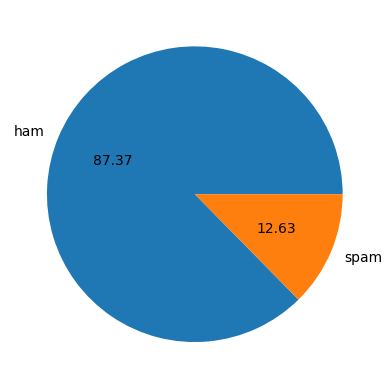

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()



### the above pie chart show data is imbalanced and Now we will see no.of sentences,words and characters in the TEXT

In [19]:
!pip install nltk
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
#giving len in terms of charctaer used in sms
df['Text'].apply(len)
#adding in new column
df['num_characters']=df['Text'].apply(len)
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
#numbers of words and #new column
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
#number of senetnces, here breaking sms interms of sentecnes
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#analyzing ham and span seperately
#1.HAM

df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
#2.Spam
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
#PLOTTING HISTOGRAM FOR BOTH HAM AND SPAM TO COMPARE IN CHARACTERS.

import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

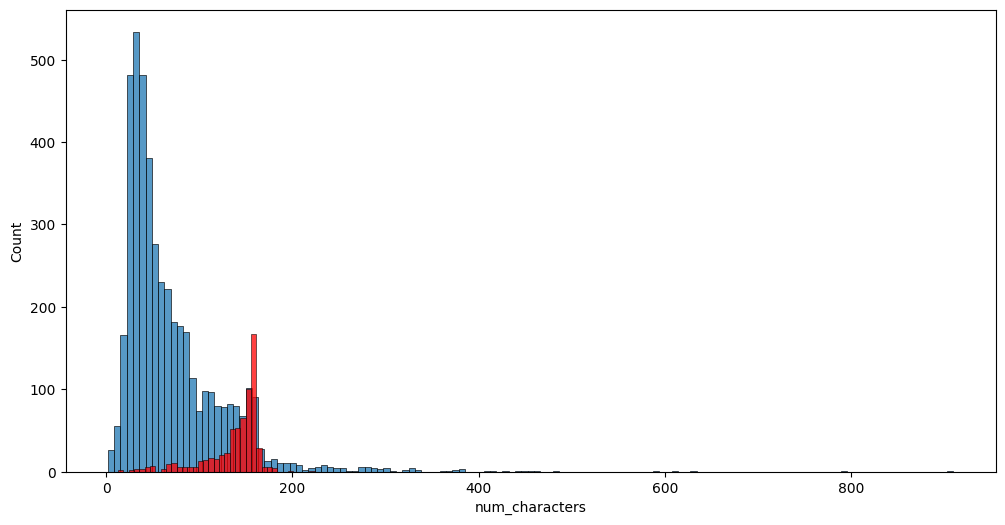

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

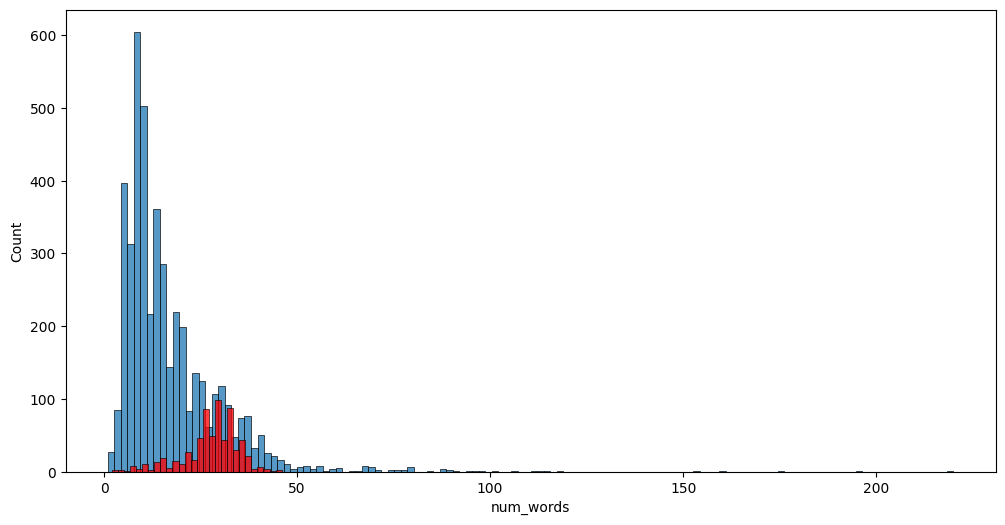

In [29]:
#PLOTTING HISTOGRAM FOR BOTH HAM AND SPAM TO COMPARE IN WORDS.
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

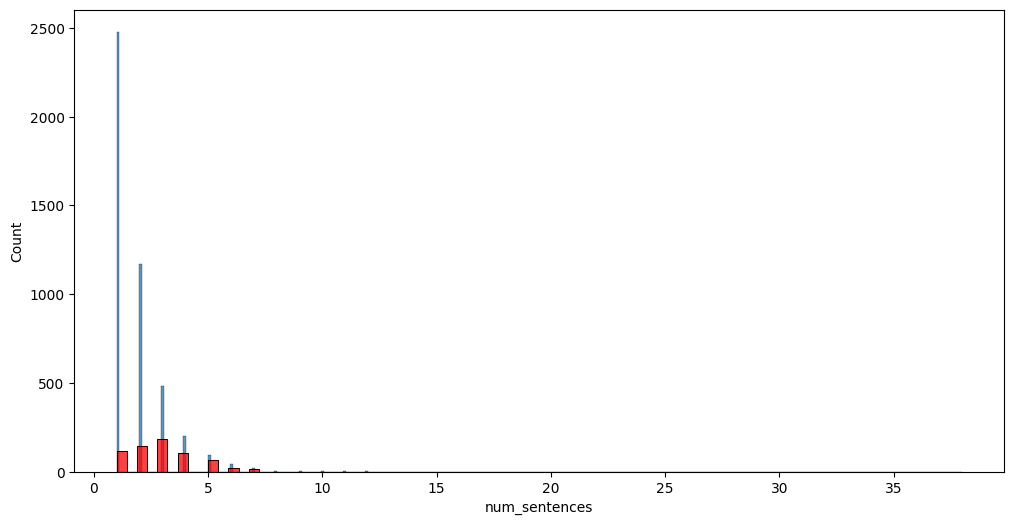

In [30]:
#PLOTTING HISTOGRAM FOR BOTH HAM AND SPAM TO COMPARE IN SENTENCES.
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_sentences'])
sns.histplot(df[df['Target']==1]['num_sentences'],color='red')

### Working with correlation 

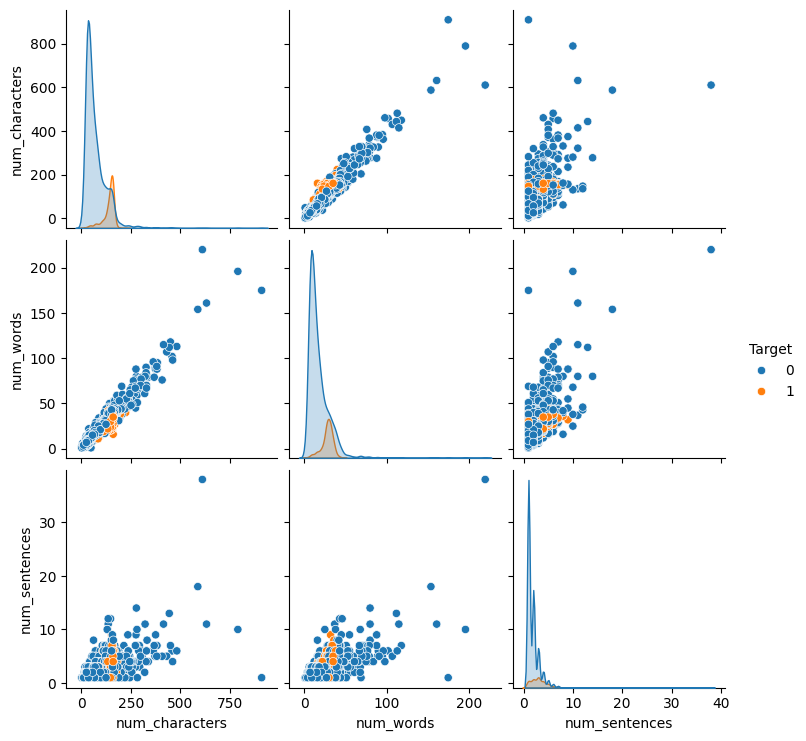

In [31]:
#finding relations among the columns
sns.pairplot(df, hue='Target')

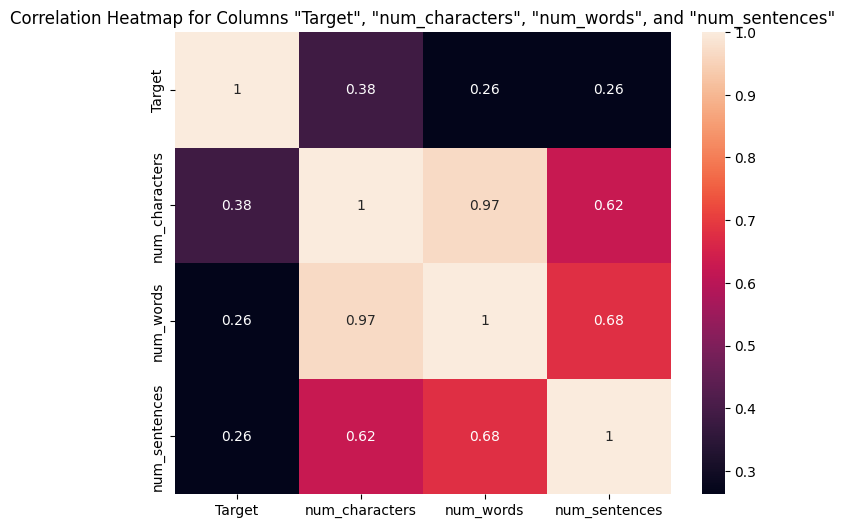

In [32]:
# columns to correlate as a list
cols_to_correlate = ['Target', 'num_characters', 'num_words', 'num_sentences']

# Subset DataFrame to include only the specified columns
subset_df = df[cols_to_correlate]

# Calculate correlation matrix for the subset DataFrame
correlation_matrix = subset_df.corr()

# Create heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,)
plt.title('Correlation Heatmap for Columns "Target", "num_characters", "num_words", and "num_sentences"')
plt.show()


### 3. DATA PREPROCESSING
Lower case
tokenization
remove special charcaters
remove punctuation
stemming(convert all words giving same meaning like: dance,dancing to dance)

In [33]:
#creating a fun to perfom all the above task
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(Text):
    Text=Text.lower()
    Text = nltk.word_tokenize(Text)
    
    y=[]
    for i in Text:
        if i.isalnum():
            y.append(i)
    
    Text = y[:]
    y.clear()
    
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    Text = y[:]
    y.clear()
    
    for i in Text:
        y.append(ps.stem(i))
        
    return " ".join(y)
            
  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
#checking
transform_text('hi, How are you mohan ?')
transform_text('Did you like my presentation on ML?')
transform_text('I love the YT lectures on ML . How about you')

'love yt lectur ml'

In [35]:
#Transforming and making new column
df['Transformed_text'] = df['Text'].apply(transform_text)

In [36]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### MAKING WORD CLOUD FOR HAM AND SPAM messeges

In [37]:
#for spam
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

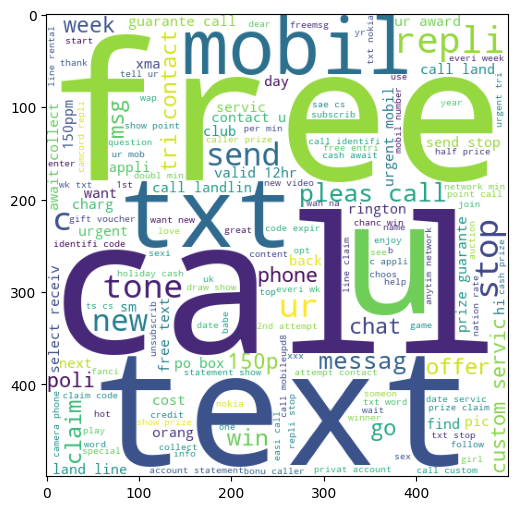

In [38]:
plt.figure(figsize=(10,6))
spam_wc = wc.generate(df[df['Target']==1]['Transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

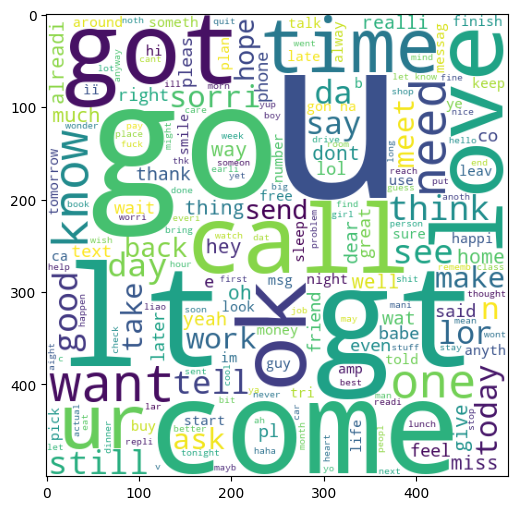

In [39]:
#for ham
plt.figure(figsize=(10,6))
ham_wc = wc.generate(df[df['Target']==0]['Transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [40]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
#finding top 30 words in spam
spam_corpus = []
for msg in df[df['Target'] == 1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [42]:
len(spam_corpus)

9939

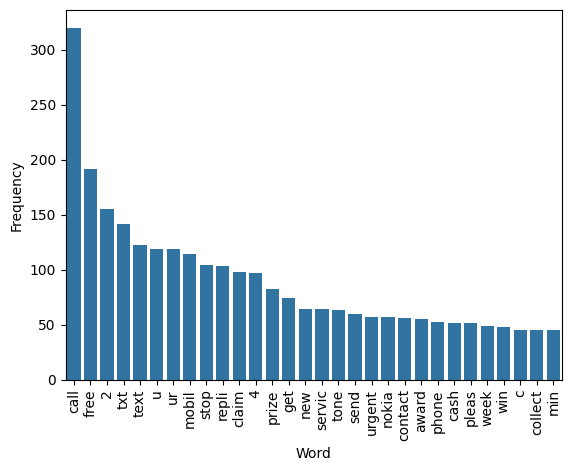

In [43]:
#prob here
from collections import Counter
#  most common 30 words and their frequencies
top_30_spam_words = Counter(spam_corpus).most_common(30)

# DataFrame from the list of tuples
top_30_spam_words_df = pd.DataFrame(top_30_spam_words, columns=['Word', 'Frequency'])

# bar plot
sns.barplot(x='Word', y='Frequency', data=top_30_spam_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [44]:
#finding top 30 words in ham
ham_corpus = []
for msg in df[df['Target']== 0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [45]:
len(ham_corpus)

35404

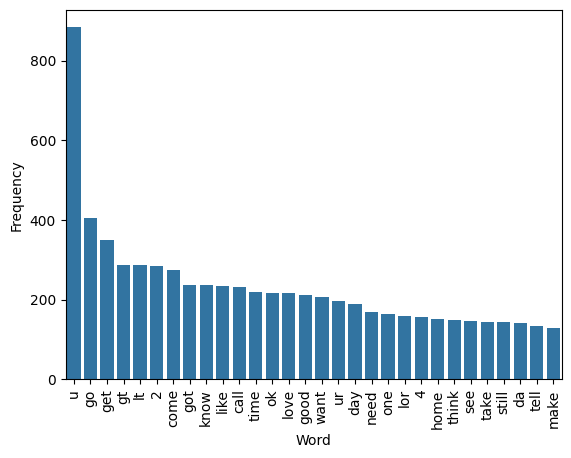

In [46]:
from collections import Counter
#  most common 30 words ham and their frequencies
top_30_ham_words = Counter(ham_corpus).most_common(30)

# Create a DataFrame from the list of tuples
top_30_ham_words_df = pd.DataFrame(top_30_ham_words, columns=['Word', 'Frequency'])

#  bar plot
sns.barplot(x='Word', y='Frequency', data=top_30_ham_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [47]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### 4.MODEL BUILDING

In [109]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000) #used to give importance to each words in a documnets
cv = CountVectorizer()

In [110]:
#converting the text data in the 'Transformed_text' column of DataFrame
# X = cv.fit_transform(df['Transformed_text']).toarray()
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [111]:
X.shape

(5169, 3000)

In [112]:
#extracting values
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [115]:
#calling algorithms. trying few because i don't know data distribution at first
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [116]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [117]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [118]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [119]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


### NOW working on TIFIDF AND MNB model NOW working on others to compare.

In [120]:
!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [121]:
#made objest for all
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [122]:
#made disctonaries with keys and values
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [123]:
#trains a classifier clf and give accuarcy and precsions

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [124]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [125]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [132]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [133]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [134]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [135]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


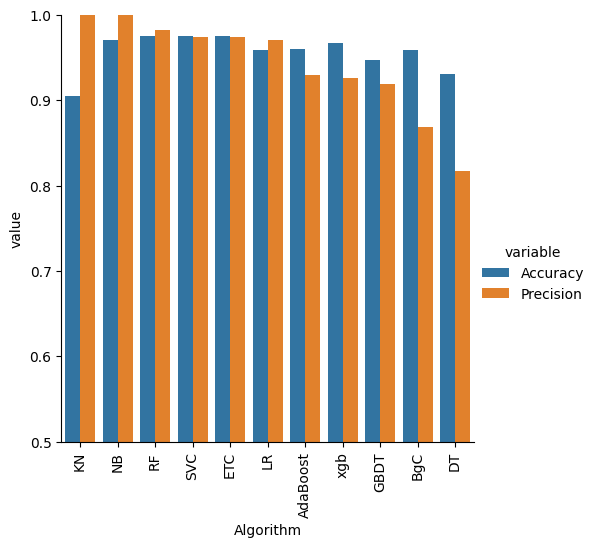

In [136]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### AFTER ALL WE WILL USE MULTINOMINAL NAIVE BAYES